In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib
from windrose import WindroseAxes
import seaborn as sns

In [2]:
# netCDF files
fn='C:\\Users\\odemeo\\Documents\\Field_Data_Processing\\DUNEX\\1149\\1149wxt-a.nc'

In [3]:
# Read in mooring 1149
ds=xr.open_dataset(fn)

# Make statistics table
df=ds.to_dataframe()
df.describe()

,WD_410,WD_gust,WS_min,WS_401,WG_402,T_21,RH_910,Rn_963
count,59386.000000,59386.000000,59386.000000,59386.000000,59386.000000,59386.000000,59386.000000,59386.000000
mean,155.165207,192.159744,3.329541,5.214722,6.754082,22.583731,74.466263,46.974598
std,111.728752,109.475716,2.087159,2.452880,3.020759,2.507041,11.966393,35.094139
min,0.960000,0.960000,0.000000,0.200000,0.300000,14.700000,34.900002,0.000000
25%,49.959999,71.959999,1.700000,3.400000,4.500000,21.000000,67.300003,22.860001
50%,139.960007,219.960007,2.900000,5.100000,6.700000,22.600000,76.800003,29.920000
75%,251.960007,293.959991,4.500000,6.700000,8.600000,24.600000,84.000000,92.129997
max,359.959991,359.959991,13.800000,17.200001,20.299999,29.100000,93.000000,93.949997


In [4]:
# Put variables into arrays
time=ds['time'].values
wdir_mean=ds['WD_410'].values
wdir_max=ds['WD_gust'].values
wsp_min=ds['WS_min'].values
wsp_mean=ds['WS_401'].values
wsp_max=ds['WG_402'].values
temp=ds['T_21'].values
relh=ds['RH_910'].values
rain=ds['Rn_963'].values

# Get rid of bad rows
nans=np.argwhere(np.isnan(wdir_mean)) # Find rows of NaNs

time=np.delete(time,nans)
wdir_mean=np.delete(wdir_mean,nans)
wdir_max=np.delete(wdir_max,nans)
wsp_min=np.delete(wsp_min,nans)
wsp_mean=np.delete(wsp_mean,nans)
wsp_max=np.delete(wsp_max,nans)
temp=np.delete(temp,nans)
relh=np.delete(relh,nans)
rain=np.delete(rain,nans)

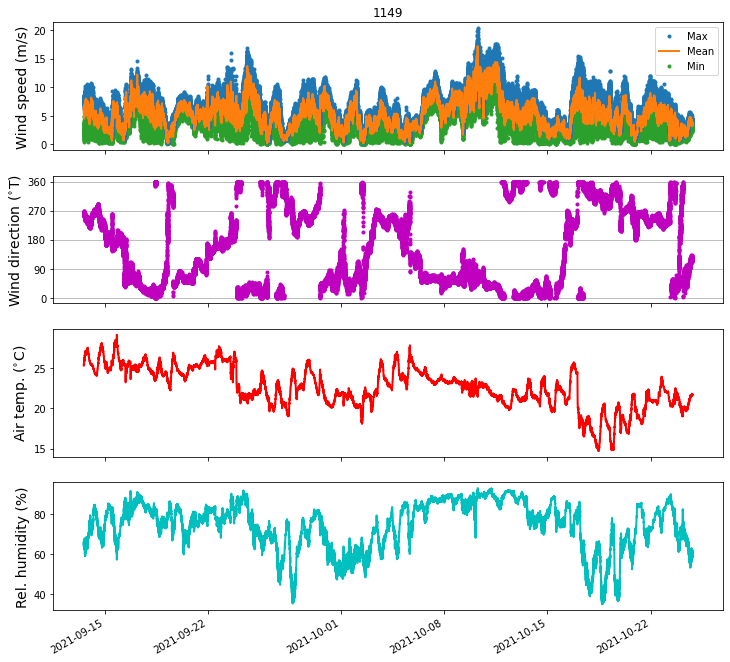

In [5]:
# Time-series plots
fig, ax=plt.subplots(nrows=4, ncols=1, sharey=False, sharex=True, squeeze=True, figsize = (12,12))

# Wind speed
ax[0].plot(time,wsp_max, '.',zorder=1,label='Max')
ax[0].plot(time,wsp_mean,'-',linewidth=2,zorder=2,label='Mean')
ax[0].plot(time,wsp_min, '.',zorder=0,label='Min')
ax[0].set_ylabel('Wind speed (m/s)',fontsize=14)
ax[0].legend()
ax[0].title.set_text('1149')
fig.autofmt_xdate() # Rotate x-axis labels so you can read all of them
#ax[0].text(.02,.85,'Wind speed',fontsize=16,transform=ax[0].transAxes)

# Wind direction
ax[1].plot(time,wdir_mean,'m.',linewidth=2)
ax[1].set_yticks([0.,90.,180.,270,360])
ax[1].set_ylabel('Wind direction ($^{\circ}$T)',fontsize=14)
ax[1].grid(axis = 'y')
#ax[1].text(.02,.85,'Wind direction (from)',fontsize=16,transform=ax[1].transAxes)

# Temp
ax[2].plot(time,temp,'r-',linewidth=2)
ax[2].set_ylabel('Air temp. ($^{\circ}$C)',fontsize=14)
#ax[2].text(.02,.1,'Air temperature',fontsize=16,transform=ax[2].transAxes)

# Relative humidity
ax[3].plot(time,relh,'c-',linewidth=2)
ax[3].set_ylabel('Rel. humidity (%)',fontsize=14);
#ax[3].text(.02,.1,'Relative humidity',fontsize=16,transform=ax[4].transAxes)

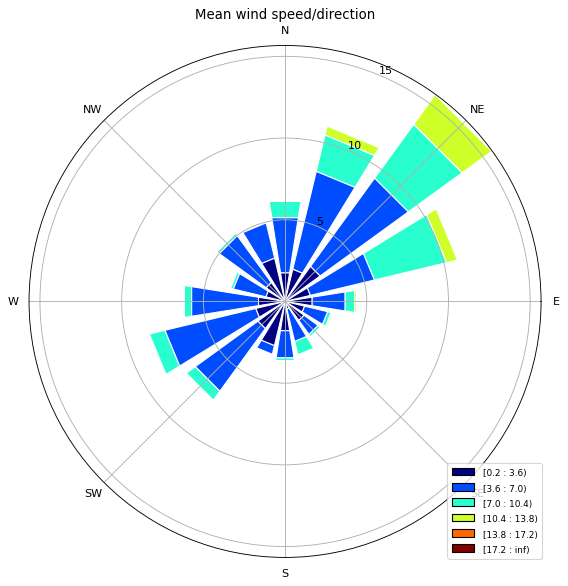

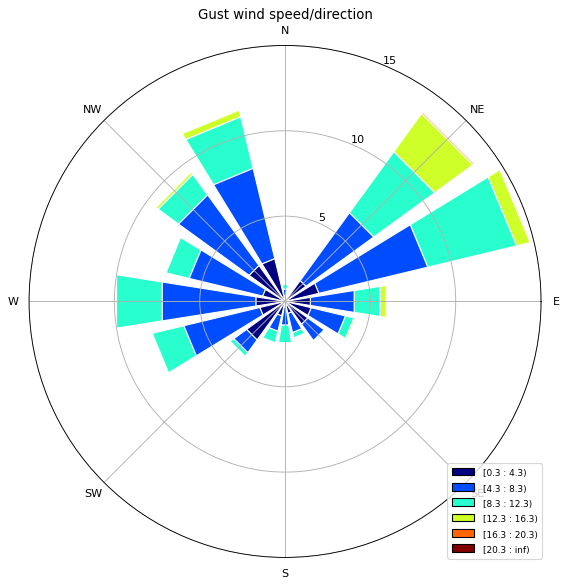

In [6]:
# Wind rose plot

# Mean wind dir/sp
ax=WindroseAxes.from_ax()
ax.bar(wdir_mean, wsp_mean, normed=True, opening=0.8, edgecolor='white')
ax.set_legend(loc=4)
plt.title('Mean wind speed/direction')
ax.set_yticks(np.arange(5, 20, step=5))
ax.set_yticklabels(np.arange(5, 20, step=5))
# ax.set_xticklabels((90, 45, 0, 315, 270, 225, 180, 135)) # Add this line bc there is an error in windrose axes
ax.set_xticklabels(['E', 'NE','N', 'NW', 'W', 'SW', 'S', 'SE']); # Add this line bc there is an error in windrose axes

# Gust wind dir/sp
ax=WindroseAxes.from_ax()
ax.bar(wdir_max, wsp_max, normed=True, opening=0.8, edgecolor='white')
ax.set_legend(loc=4)
plt.title('Gust wind speed/direction')
ax.set_yticks(np.arange(5, 20, step=5))
ax.set_yticklabels(np.arange(5, 20, step=5))
#ax.set_xticklabels((90, 45, 0, 315, 270, 225, 180, 135)) # Add this line bc there is an error in windrose axes
ax.set_xticklabels(['E', 'NE','N', 'NW', 'W', 'SW', 'S', 'SE']); # Add this line bc there is an error in windrose axes

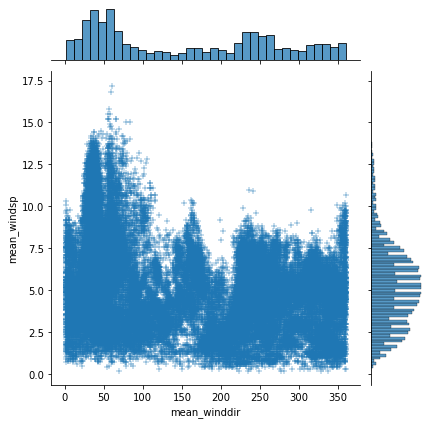

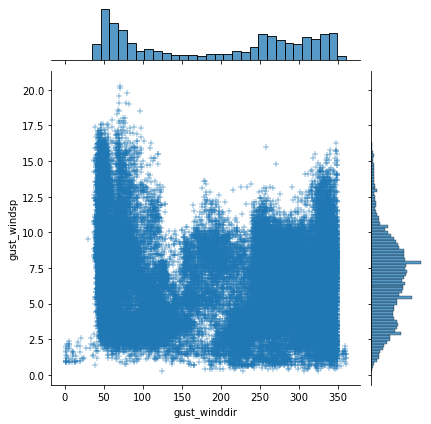

In [7]:
# Compute joint-probability

# Mean wind dir/sp
df_wind_mean=pd.DataFrame({'mean_windsp': wsp_mean, 'mean_winddir': wdir_mean})
sns.jointplot(data=df_wind_mean, x="mean_winddir", y="mean_windsp",marker="+")

# Gust wind dir/sp
df_wind_gust=pd.DataFrame({'gust_windsp': wsp_max, 'gust_winddir': wdir_max})
sns.jointplot(data=df_wind_gust, x="gust_winddir", y="gust_windsp",marker="+")

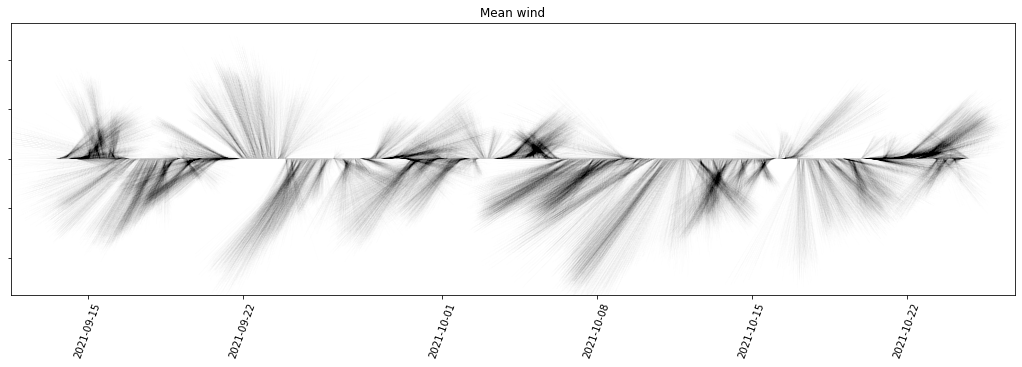

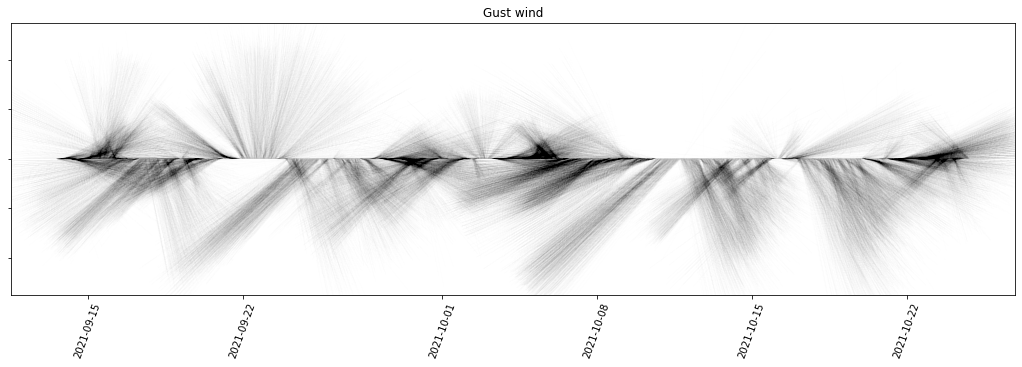

In [8]:
# Stick plots

# Calculate wind components from speed and metereological wind direction (wind from direction)
u_mean = -wsp_mean * np.sin(np.radians(wdir_mean))
v_mean = -wsp_mean * np.cos(np.radians(wdir_mean))

props = {'units' : "dots",
    'width' : 0.003,
    'headwidth': 0,
    'headlength': 0,
    'headaxislength': 0,
    'scale' : .08
        }
fig, ax = plt.subplots(figsize=(18, 5))
qiv = ax.quiver(time, [[0]*len(time)] , u_mean, v_mean, angles='uv', **props)
plt.xticks(rotation=70)
plt.setp(ax.get_yticklabels(), visible=False)
plt.title('Mean wind')

# Calculate wind components from speed and metereological wind direction (wind from direction)
u_max = -wsp_max * np.sin(np.radians(wdir_max))
v_max = -wsp_max * np.cos(np.radians(wdir_max))

props = {'units' : "dots",
    'width' : 0.003,
    'headwidth': 0,
    'headlength': 0,
    'headaxislength': 0,
    'scale' : .08
        }
fig, ax = plt.subplots(figsize=(18, 5))
qiv = ax.quiver(time, [[0]*len(time)] , u_max, v_max, angles='uv', **props)
plt.xticks(rotation=70)
plt.setp(ax.get_yticklabels(), visible=False)
plt.title('Gust wind');